# Task 1: Defect Analysis
Defective hotspots are files where defects are frequently found. We will implement a simple yet effective approach to identify these hotspots by analyzing commit messages for keywords that indicate defect resolutions, such as “fix”, “bug”, “error”, or “issue”. To complete this task, follow the steps described below.


1.1 Use Git to extract all the commit messages after 2023-01-01. The cutoff date is chosenfor computational reasons and will be used for the rest of the tasks as well.

In [2]:
# pip install pydriller pandas
from pathlib import Path
from datetime import datetime
from pydriller import Repository
import pandas as pd

# Settings
REPO_DIR = Path(".").resolve()      # current repo
SINCE = datetime(2023, 1, 1)        # cutoff date

commits_rows = []
changes_rows = []

repo = Repository(
    str(REPO_DIR),
    since=SINCE,
    only_no_merge=True,             # exclude merge commits for cleaner stats
)

for commit in repo.traverse_commits():
    commits_rows.append({
        "commit": commit.hash,
        "author_name": commit.author.name,
        "author_email": commit.author.email,
        "author_date": commit.author_date.isoformat(),
        "subject": commit.msg.splitlines()[0] if commit.msg else "",
        "message": commit.msg or "",
        "insertions": commit.insertions,
        "deletions": commit.deletions,
        "files_changed": len(commit.modified_files),
        "in_main_branch": commit.in_main_branch,
    })
    for mf in commit.modified_files:
        path = mf.new_path or mf.old_path or mf.filename
        changes_rows.append({
            "commit": commit.hash,
            "file": path,
            "change_type": getattr(mf.change_type, "name", str(mf.change_type)),
            "added": mf.added_lines,
            "deleted": mf.deleted_lines,
        })

commits_df = pd.DataFrame(commits_rows)
changes_df = pd.DataFrame(changes_rows)

# Save CSVs
commits_csv = "commits_since_2023-01-01.csv"
changes_csv = "file_changes_since_2023-01-01.csv"
commits_df.to_csv(commits_csv, index=False)
changes_df.to_csv(changes_csv, index=False)

print(f"Repo: {REPO_DIR}")
print(f"Commits since 2023-01-01: {len(commits_df)} -> {commits_csv}")
print(f"File-change rows: {len(changes_df)} -> {changes_csv}")

# Preview
display(commits_df.head(10))
display(changes_df.head(10))

Repo: C:\code\transformers
Commits since 2023-01-01: 8818 -> commits_since_2023-01-01.csv
File-change rows: 70231 -> file_changes_since_2023-01-01.csv


,commit,author_name,author_email,author_date,subject,message,insertions,deletions,files_changed,in_main_branch
0,588faad1062198e45cf3aebed21dc1fc1e1ed0d7,Joao Gante,joaofranciscocardosogante@gmail.com,2023-01-02T10:25:44+00:00,Generate: TF XLA beam sample (#20927),Generate: TF XLA beam sample (#20927)\n\n* bea...,163,1160,2,True
1,a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47,ivanllt,ivanlau91@hotmail.com,2023-01-03T18:53:33+08:00,Fix T5 docstring (#20957),Fix T5 docstring (#20957)\n\nFix start_docstri...,1,1,1,True
2,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,Joao Gante,joaofranciscocardosogante@gmail.com,2023-01-03T10:54:56+00:00,Generate: delete unused TF `_reorder_cache` (#...,Generate: delete unused TF `_reorder_cache` (#...,0,207,23,True
3,367fdf3330121a075c06d796bb95dfb1c69c65e4,Konstantin Kotik,22777646+kotikkonstantin@users.noreply.github.com,2023-01-03T14:29:02+03:00,`MinNewTokensLengthLogitsProcessor` for `.gene...,`MinNewTokensLengthLogitsProcessor` for `.gene...,99,0,6,True
4,305f41e4dea99d9fdc212287263b3748aacc63d3,Alara Dirik,8944735+alaradirik@users.noreply.github.com,2023-01-03T15:56:02+03:00,Fix post_process_object_detection method descr...,Fix post_process_object_detection method descr...,18,17,5,True
5,9c6f7485a6ab2364f04df5893ab0e09f3c889b5d,NielsRogge,48327001+NielsRogge@users.noreply.github.com,2023-01-03T14:17:18+01:00,Add GIT (GenerativeImage2Text) (#20295),Add GIT (GenerativeImage2Text) (#20295)\n\n* F...,3150,16,32,True
6,e697c912c26f77ee8e1e62ae5ff8b25f3a451e48,Yih-Dar,2521628+ydshieh@users.noreply.github.com,2023-01-03T14:37:40+01:00,Remove more unused attributes in config classe...,Remove more unused attributes in config classe...,0,16,4,True
7,9c9fe89f84f7aa8ec29f19c39a1bf7f1bca82fc3,"Wang, Yi",yi.a.wang@intel.com,2023-01-03T22:33:11+08:00,[run_clm example] add torch_dtype option for m...,[run_clm example] add torch_dtype option for m...,17,0,1,True
8,a9653400d3fac5b316429f641ae61846ae024cc7,JeongYeon Nam,ckleckle@gmail.com,2023-01-03T23:43:26+09:00,Fix valid ratio for Deformable Detr (#20958),Fix valid ratio for Deformable Detr (#20958)\n...,2,5,1,True
9,15c68c67f4890ef62ce73310d0e1982d5ea91477,samuelpullely,51292066+samuelpullely@users.noreply.github.com,2023-01-03T15:59:08+01:00,Enable `decoder_attention_mask` in `generate` ...,Enable `decoder_attention_mask` in `generate` ...,46,1,4,True


,commit,file,change_type,added,deleted
0,588faad1062198e45cf3aebed21dc1fc1e1ed0d7,src\transformers\generation\tf_utils.py,MODIFY,98,1101
1,588faad1062198e45cf3aebed21dc1fc1e1ed0d7,src\transformers\models\rag\modeling_tf_rag.py,MODIFY,65,59
2,a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47,src\transformers\models\t5\modeling_t5.py,MODIFY,1,1
3,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\generation\tf_utils.py,MODIFY,0,4
4,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\bart\modeling_tf_bart.py,MODIFY,0,10
5,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\bert\modeling_tf_bert.py,MODIFY,0,7
6,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\blenderbot\modeling_tf...,MODIFY,0,11
7,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\blenderbot_small\model...,MODIFY,0,11
8,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\camembert\modeling_tf_...,MODIFY,0,8
9,4fd89e49788f60b021b4e2c578a1fb12f1e900e4,src\transformers\models\ctrl\modeling_tf_ctrl.py,MODIFY,0,6


1.2 Analyze these messages to detect the presence of specific keywords of your choice related to defect fixes.


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


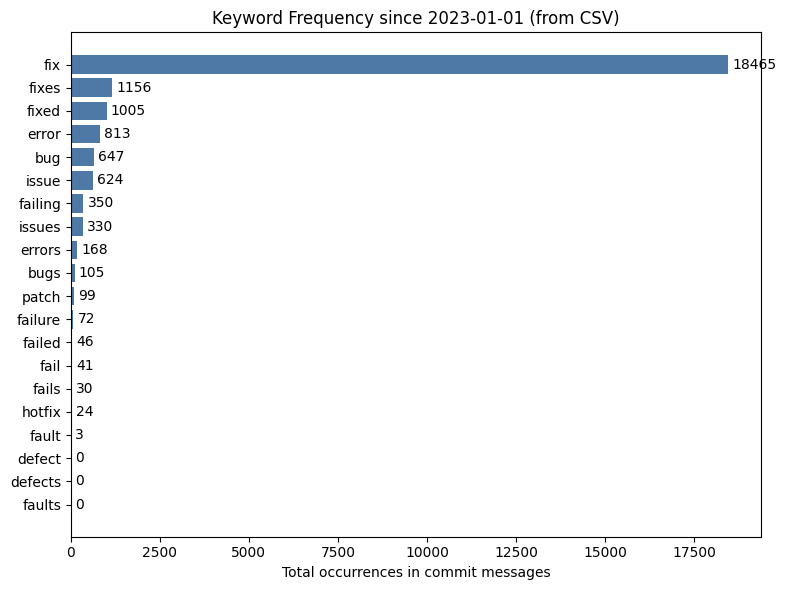

In [9]:
# Read commit messages from CSV and plot total counts of selected keywords
%pip install -q matplotlib
import pandas as pd
import re
import matplotlib.pyplot as plt

CSV_PATH = r"commits_since_2023-01-01.csv"

keywords = [
    "fix", "fixes", "fixed", "bug", "bugs", "issue", "issues", "error", "errors",
    "defect", "defects", "fault", "faults", "hotfix", "patch",
    "fail", "fails", "failed", "failing", "failure",
]

df = pd.read_csv(CSV_PATH)

# Combine available text fields (prefer message, include subject if present)
text_cols = [c for c in ["message", "subject"] if c in df.columns]
if not text_cols:
    raise ValueError(f"No text columns 'message' or 'subject' found in {CSV_PATH}")

all_text = "\n".join(
    df[text_cols].fillna("").agg(" ".join, axis=1).astype(str).tolist()
)

# Count whole-word, case-insensitive occurrences
counts = {}
for kw in keywords:
    pattern = rf"\b{re.escape(kw)}\b"
    counts[kw] = len(re.findall(pattern, all_text, flags=re.IGNORECASE))

# Sort and plot
items = sorted(counts.items(), key=lambda kv: kv[1], reverse=True)
labels = [k for k, _ in items]
values = [v for _, v in items]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(labels[::-1], values[::-1], color="#4e79a7")
ax.set_xlabel("Total occurrences in commit messages")
ax.set_title("Keyword Frequency since 2023-01-01 (from CSV)")

# Add counts on bars
try:
    ax.bar_label(bars, fmt="%d", padding=3)
except AttributeError:
    # Fallback for older Matplotlib
    for bar in bars:
        w = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(w + max(values) * 0.01 if values else 0.1, y, f"{int(w)}",
                va="center", fontsize=9)

fig.tight_layout()
plt.show()

1.3 Calculate and plot the total number of defects per month. Why do you think the number of defects dropped sharply in October 2025?

Total commits considered: 8818
Defect-related commits: 5448


C:\Users\mikej\AppData\Local\Temp\ipykernel_25744\2244908554.py:38: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(month=lambda d: d[date_col].dt.to_period("M").dt.to_timestamp())


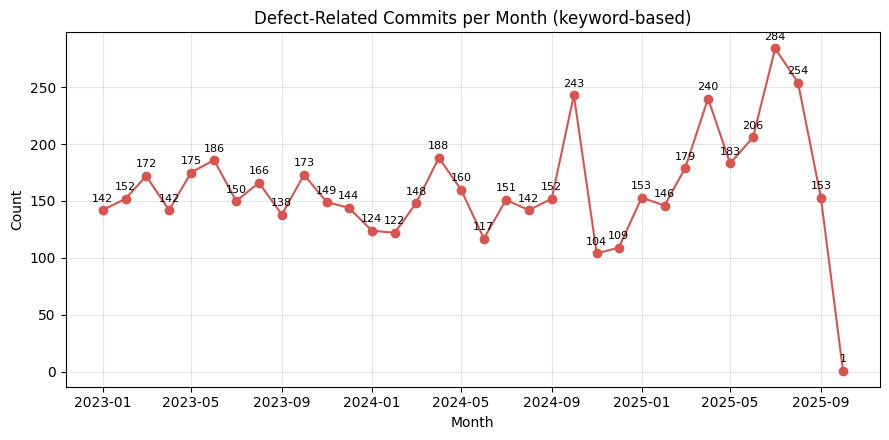

In [10]:
# Monthly defect-related commit counts (keywords -> defect proxy)
import pandas as pd
import re
import matplotlib.pyplot as plt

CSV_PATH = r"commits_since_2023-01-01.csv"

keywords = [
    "fix", "fixes", "fixed", "bug", "bugs", "issue", "issues", "error", "errors",
    "defect", "defects", "fault", "faults", "hotfix", "patch",
    "fail", "fails", "failed", "failing", "failure",
]

df = pd.read_csv(CSV_PATH)

# Choose text source (message preferred, fallback to subject)
text_col = "message" if "message" in df.columns else ("subject" if "subject" in df.columns else None)
if text_col is None:
    raise ValueError("No commit message column found.")

# Build regex once (whole-word, case-insensitive)
pattern = re.compile(r"\b(" + "|".join(re.escape(k) for k in keywords) + r")\b", re.IGNORECASE)

# Flag defect-related commits
df["is_defect"] = df[text_col].fillna("").apply(lambda txt: bool(pattern.search(txt)))

# Parse dates
date_col = "author_date" if "author_date" in df.columns else "date"
df[date_col] = pd.to_datetime(df[date_col], errors="coerce", utc=True)
df = df.dropna(subset=[date_col])

# Filter to defect commits
defect_df = df[df["is_defect"]].copy()

# Aggregate per month
monthly = (
    defect_df
    .assign(month=lambda d: d[date_col].dt.to_period("M").dt.to_timestamp())
    .groupby("month", as_index=False)
    .size()
    .rename(columns={"size": "defect_commits"})
    .sort_values("month")
)

print(f"Total commits considered: {len(df)}")
print(f"Defect-related commits: {len(defect_df)}")

# Plot
plt.figure(figsize=(9, 4.5))
plt.plot(monthly["month"], monthly["defect_commits"], marker="o", color="#d9534f")
plt.title("Defect-Related Commits per Month (keyword-based)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(alpha=0.3)
# Annotate each point
for x, y in zip(monthly["month"], monthly["defect_commits"]):
    plt.text(x, y + max(monthly["defect_commits"])*0.02, str(y), ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

CSV_PATH = r"commits_since_2023-01-01.csv"

df = pd.read_csv(CSV_PATH)

# Detect and parse date column
date_col = "author_date" if "author_date" in df.columns else ("date" if "date" in df.columns else None)
if date_col is None:
    raise ValueError("No date column ('author_date' or 'date') found in CSV.")

df[date_col] = pd.to_datetime(df[date_col], errors="coerce", utc=True)
df = df.dropna(subset=[date_col])

# Filter to October 2025 and report
oct25 = df[df[date_col].dt.to_period("M") == pd.Period("2025-10")]
print(f"Total commits in 2025-10: {len(oct25)}")

# Preview a few rows
cols = [c for c in ["commit", date_col, "subject"] if c in df.columns]
display(oct25[cols].head(10))

Total commits in 2025-10: 2


C:\Users\mikej\AppData\Local\Temp\ipykernel_25744\3301135449.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  oct25 = df[df[date_col].dt.to_period("M") == pd.Period("2025-10")]


,commit,author_date,subject
8815,2ccc6cae21faaf11631efa5fb9054687ae5dc931,2025-10-03 16:29:51+00:00,v4.57.0 Branch (#41310)
8816,8ac2b916b042b1f78b75c9eb941c0f5d2cdd8e10,2025-10-03 16:32:49+00:00,Release: v4.57.0


Answer
 
There are only two commits in October 2025 in our mined dataset. Inspecting the most recent commit shows the subject Release v4.57.0. This indicates that on October 3rd, 2025, the project created the release tag v4.57.0. Since our analysis was performed on top of this tag (detached HEAD), we only see the commit history up to the release date. All commits made after October 3rd, 2025, were added to the main branch or to subsequent release branches, but these are not part of the checked-out tag. This explains the sudden drop in defect-related commits after October.

1.4 Calculate and plot the number of defects per month for the two files with the highest number of defects.

- In which month were the most defects introduced? How would you explain it? Manually examine the repository for that month (e.g., change logs, releases, commit messages) and come up with a hypothesis.

1.5 What are the limitations of this method for finding defective hotspots?

#  Task 2: Complexity Analysis


##  2.1 Select two complexity metrics of your choice.

## 2.2 Calculate the complexity of all .py files in the repository using the selected metrics.




[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Analyzed 3691 Python files.
Saved per-file metrics to complexity_cc_loc.csv
Analyzed 3691 Python files.
Saved per-file metrics to complexity_cc_loc.csv


,path,loc,cc
286,src\transformers\trainer.py,4016,1228
272,src\transformers\modeling_utils.py,3952,1223
21,tests\test_modeling_common.py,3436,808
1965,src\transformers\models\seamless_m4t_v2\modeli...,2852,709
1959,src\transformers\models\seamless_m4t\modeling_...,2703,667
346,src\transformers\integrations\integration_util...,1797,629
323,src\transformers\generation\utils.py,2483,618
271,src\transformers\modeling_tf_utils.py,2049,610
284,src\transformers\tokenization_utils_base.py,2479,605
1850,src\transformers\models\qwen3_omni_moe\modelin...,2973,602


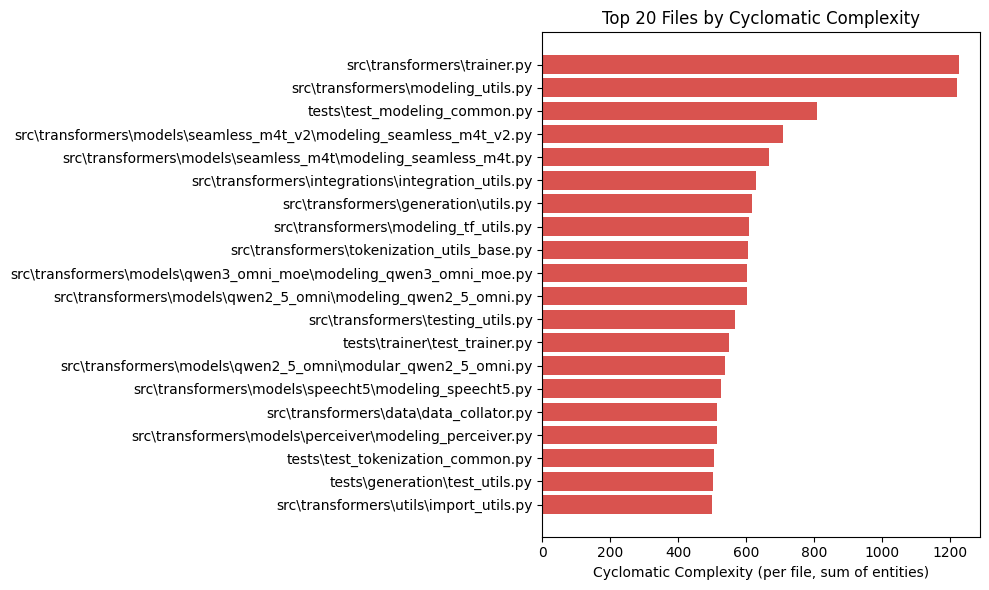

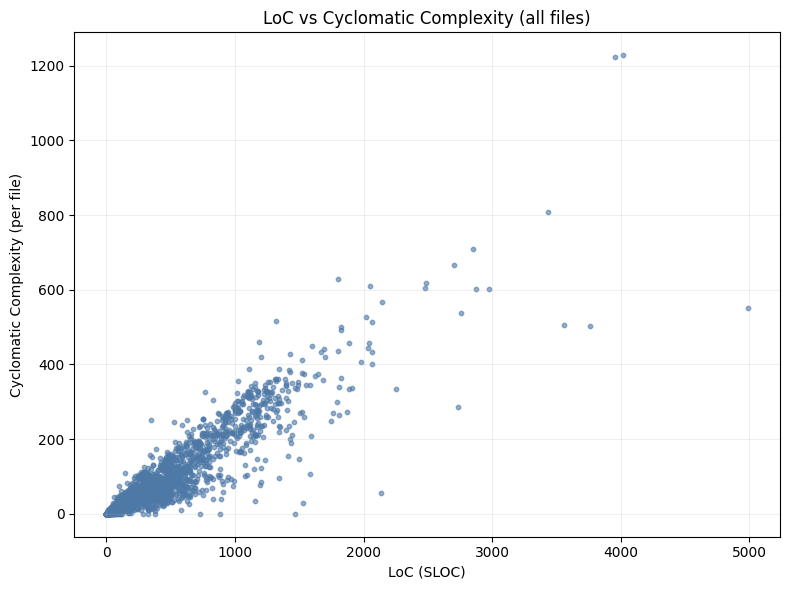

In [3]:
# CC + LoC (SLOC) for all .py files; save CSV and basic plots (single CC value per file)
%pip install -q radon pandas matplotlib

from pathlib import Path
from radon.raw import analyze as raw_analyze
from radon.complexity import cc_visit
import pandas as pd
import matplotlib.pyplot as plt

ROOT = Path(".").resolve()

# Folders to skip to avoid noise/.venv/etc.
SKIP_DIR_PARTS = {
    ".venv", "venv", "env", ".git", "__pycache__", "build", "dist",
    ".tox", ".pytest_cache", ".mypy_cache", ".idea", ".vscode"
}

def should_skip(p: Path) -> bool:
    return any(part in SKIP_DIR_PARTS for part in p.parts)

files = [p for p in ROOT.rglob("*.py") if p.is_file() and not should_skip(p)]

rows = []
for fp in files:
    try:
        text = fp.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        continue

    # LoC metric (SLOC)
    raw = raw_analyze(text)
    sloc = raw.sloc

    # Cyclomatic complexity per entity (functions/classes/methods)
    try:
        entities = cc_visit(text)
        cc_values = [e.complexity for e in entities]
    except Exception:
        cc_values = []

    # Single file-level CC: use sum of entity CCs
    cc = sum(cc_values) if cc_values else 0

    rows.append({
        "path": str(fp.relative_to(ROOT)),
        "loc": sloc,  # SLOC as LoC
        "cc": cc,     # single CC value per file
    })

# Per-file CC and LoC only
cols = ["path", "loc", "cc"]
df = pd.DataFrame(rows, columns=cols).sort_values(["cc", "loc"], ascending=False)
csv_path = "complexity_cc_loc.csv"
df.to_csv(csv_path, index=False)

print(f"Analyzed {len(df)} Python files.")
print(f"Saved per-file metrics to {csv_path}")
display(df.head(10))

# Hotspot 1: Top 20 by CC
top = df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top["path"][::-1], top["cc"][::-1], color="#d9534f")
plt.xlabel("Cyclomatic Complexity (per file, sum of entities)")
plt.title("Top 20 Files by Cyclomatic Complexity")
plt.tight_layout()
plt.show()

# Hotspot 2: Scatter of LoC vs CC
plt.figure(figsize=(8, 6))
plt.scatter(df["loc"], df["cc"], s=10, alpha=0.6, color="#4e79a7")
plt.xlabel("LoC (SLOC)")
plt.ylabel("Cyclomatic Complexity (per file)")
plt.title("LoC vs Cyclomatic Complexity (all files)")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

## 2.3 Visualize the complexity hotspots. 
The visualization should effectively convey which parts of the code are more complex or change more frequently. Feel free to use any visualization of your choice and explain the rationale behind your decision.

In [ ]:
# 2.3 Visualize hotspots using only CC and LoC (single CC metric)
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "complexity_cc_loc.csv"
df = pd.read_csv(csv_path)

# Top 30 by Cyclomatic Complexity (cc)
top = df.sort_values("cc", ascending=False).head(30)

plt.figure(figsize=(11, 8))
plt.barh(top["path"][::-1], top["cc"][::-1], color="#f0ad4e")
plt.xlabel("Cyclomatic Complexity (per file)")
plt.title("Top 30 Files by Cyclomatic Complexity")
plt.tight_layout()
plt.show()


## 2.4 What can you say about the correlation between the two complexity measures in this repository? 
 For example, if you selected CC and LoC, what can you say for the statement “Files with more lines of code tend to have higher cyclomatic
 complexity”?

In [ ]:
# 2.4 Correlation between LoC and CC (single CC per file) + trendline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = "complexity_cc_loc.csv"
df = pd.read_csv(csv_path)

# Filter out degenerate rows (optional)
df = df[(df["loc"].fillna(0) >= 0) & (df["cc"].fillna(0) >= 0)].copy()

pearson = df[["loc", "cc"]].corr(method="pearson").iloc[0, 1]
spearman = df[["loc", "cc"]].corr(method="spearman").iloc[0, 1]

print(f"Pearson(loc, cc): {pearson:.3f}")
print(f"Spearman(loc, cc): {spearman:.3f}")

# Scatter with simple linear fit
x = df["loc"].values
y = df["cc"].values

if len(x) >= 2 and np.isfinite(x).all() and np.isfinite(y).all():
    coef = np.polyfit(x, y, 1)
    fit_y = np.polyval(coef, x)
else:
    coef = [0.0, float(np.nan)]
    fit_y = y

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, alpha=0.6, color="#4e79a7", label="files")
if np.isfinite(fit_y).all():
    # Plot trendline over the domain
    order = np.argsort(x)
    plt.plot(x[order], fit_y[order], color="#d9534f", linewidth=2, label="linear fit")
plt.xlabel("LoC (SLOC)")
plt.ylabel("Cyclomatic Complexity (per file)")
plt.title("Correlation: LoC vs Cyclomatic Complexity")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Brief text interpretation
if np.isfinite(pearson):
    tendency = "positive" if pearson > 0 else ("negative" if pearson < 0 else "no clear")
    print(
        f"Interpretation: {tendency} correlation — files with more LoC tend to have "
        f"{'higher' if pearson > 0 else ('lower' if pearson < 0 else 'similar')} CC. "
        f"(Pearson={pearson:.3f}, Spearman={spearman:.3f})"
    )


# Task 3 Coupling Analysis
Logical coupling occurs when two seemingly distinct files are functionally related. It  can be detected by mining software repositories to see which files tend to be committed together frequently over time. With that in mind, complete the following analysis:

## 3.1  Calculate the logical coupling for each file pair in the repository.
Visualize the 10 most coupled file pairs using a visualization of your choice that effectively conveys the coupling relationships. Select one of these 10 most coupled file pairs and comment on their relationship.

## 3.2 Repeat for test files.
Repeat the steps of the bullet point above, but consider only file pairs where the one file is a Python test file, i.e., starts with “test”, and the other is a Python non-test file. How would you explain this type of coupling? Is it a code smell that requires attention and signals potential refactoring opportunities or is it something different?

## 3.3 Discussion Test files
Writing tests is a time-consuming task and developers often omit it, thus, automated test generation tools have been implemented and are widely used. One of the most popular test generation tools for Python is Pynguin, that takes as input a .py file and generates passing tests for that file. Pynguin writes the generated tests to a new file in a separate folder, isolated from the project’s test suite. Suppose that you are tasked with implementing an option for Pynguin to place the tests directly in the project’s test suite, specifically in the test file that is most closely “related” with the input .py file. Discuss at least three (3) implementations for selecting the most “related” test file given a (non-test) .py  file. You do not have to implement these options at this stage.